<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/C%C3%B3pia_de_CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DICIONARIO**


totalAtivo - O ativo total de uma empresa é a soma de todos os seus ativos, ou seja, seus bens e direitos. Dessa forma, inclui o ativo circulante, realizável a longo prazo e permanente, também chamado de não circulante. A definição de ativo na contabilidade é o conjunto de bens e direitos da organização.



In [4]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [41]:

url = "/content/drive/MyDrive/solicitacoescredito.csv"
df = pd.read_csv(url)
df_sub = df[["margemBruta",  "faturamentoBruto", "duplicatasAReceber", "estoque", "totalAtivo", "passivoCirculante", "ativoCirculante", "empresa_MeEppMei"]]



In [6]:
df_filtrado = df_sub.dropna()

In [7]:
# verificando quantos registros duplicados existem
valores_duplicados = df_filtrado['totalAtivo'].duplicated()

# Imprime os valores duplicados
print(valores_duplicados)


4       False
7       False
8       False
10      False
11      False
        ...  
8958     True
8959    False
8960     True
8961     True
8963     True
Name: totalAtivo, Length: 4731, dtype: bool


In [26]:
linhas_totalAtivo_nao_zero.head()

,cnpjSemTraco,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante,empresa_MeEppMei,porte
4,CGQN15826802440348,40779757.0,11797928.0,3047791.0,25793410.0,12149031.0,14758917.0,False,vazio
7,NLUX93496216176463,11958227.0,3742963.0,11902384.0,19415777.0,2538069.0,17801610.0,False,vazio
8,LOVL82962402474134,72479551.0,15980275.0,11420388.0,39455945.0,13843198.0,36827690.0,False,vazio
10,SVXA16230297135119,4575646.0,973971.0,942096.0,3609498.0,704245.0,2127907.0,True,vazio
11,ELQK41348591516215,13871246.0,115000.0,1693990.0,5595689.0,6118711.0,5369982.0,False,vazio


In [28]:
linhas_totalAtivo_nao_zero['totalAtivo'] = linhas_totalAtivo_nao_zero['totalAtivo'].round(2)
linhas_totalAtivo_nao_zero.describe()

count    4.730000e+03
mean     7.077698e+07
std      8.881692e+08
min      0.000000e+00
25%      1.051192e+06
50%      4.637565e+06
75%      1.921512e+07
max      5.482350e+10
Name: totalAtivo, dtype: float64

In [24]:
linhas_totalAtivo_nao_zero['porte'] = 'vazio'

In [ ]:
# 54823500000.000 maior valor
for item in linhas_totalAtivo_nao_zero:
  if  linhas_totalAtivo_nao_zero['totalAtivo'] < 1051192


In [23]:
linhas_totalAtivo_nao_zero.describe()


,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante
count,4.730000e+03,4.730000e+03,4.730000e+03,4.730000e+03,4.730000e+03,4.730000e+03
mean,8.932131e+07,1.664434e+07,1.524707e+07,7.077698e+07,3.398566e+07,4.453540e+07
std,4.351798e+08,2.979971e+08,8.386391e+07,8.881692e+08,4.947637e+08,4.676006e+08
min,0.000000e+00,-2.278071e+07,-2.632260e+05,0.000000e+00,-1.134941e+06,0.000000e+00
25%,2.225006e+06,3.984650e+04,1.712860e+05,1.051192e+06,1.831898e+05,8.879148e+05
50%,7.969110e+06,1.088164e+06,1.063783e+06,4.637565e+06,1.333626e+06,4.011624e+06
75%,3.075236e+07,6.576243e+06,5.493839e+06,1.921512e+07,7.444896e+06,1.637095e+07
max,6.426115e+09,2.009358e+10,1.293428e+09,5.482350e+10,2.750382e+10,2.903832e+10


In [20]:
# Filtra as linhas onde 'totalAtivo' é diferente de zero
linhas_totalAtivo_nao_zero = df_filtrado[df_filtrado['totalAtivo'] >= 0]

# Imprime as colunas onde 'totalAtivo' é diferente de zero
print("Colunas onde 'totalAtivo' é diferente de zero:")
print(linhas_totalAtivo_nao_zero)


Colunas onde 'totalAtivo' é diferente de zero:
            cnpjSemTraco  faturamentoBruto  duplicatasAReceber     estoque  \
4     CGQN15826802440348        40779757.0          11797928.0   3047791.0   
7     NLUX93496216176463        11958227.0           3742963.0  11902384.0   
8     LOVL82962402474134        72479551.0          15980275.0  11420388.0   
10    SVXA16230297135119         4575646.0            973971.0    942096.0   
11    ELQK41348591516215        13871246.0            115000.0   1693990.0   
...                  ...               ...                 ...         ...   
8958  XIIJ66670040144884       133280394.0          11285664.0   5718842.0   
8959  JXCH36268697453955         4887005.0           3471368.0   1316604.0   
8960  IPFS70635894073808         5392166.0                 0.0         0.0   
8961  IFOK15843566708440       119702196.0          15784605.0  15243870.0   
8963  VKMN77216991472135         4699829.0           2473428.0    892027.0   

      totalAtivo

In [9]:
# ordenando do menor pro maior pela coluna totalAtivo
df_filtrado_ordenado_semZero = linhas_totalAtivo_nao_zero.sort_values('totalAtivo')

indice_meio = len(df_filtrado_ordenado_semZero) // 2

valor_do_meio = df_filtrado_ordenado_semZero.iloc[indice_meio]['totalAtivo']

# pega o valor do meio da coluna totalAtivo
registro_do_meio = df_filtrado_ordenado_semZero[df_filtrado_ordenado_semZero['totalAtivo'] == valor_do_meio].iloc[0]

print("Registro com o valor do meio na coluna 'totalAtivo':")
print(registro_do_meio)

Registro com o valor do meio na coluna 'totalAtivo':
cnpjSemTraco          DSDP42915296213541
faturamentoBruto              12794141.0
duplicatasAReceber             3017403.0
estoque                        1357628.0
totalAtivo                     6642107.0
passivoCirculante              6372107.0
ativoCirculante                6597377.0
empresa_MeEppMei                    True
Name: 4554, dtype: object


In [37]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [38]:
# linha que retorna o registro pelo cnpj informado
linha_por_cnpj = df_filtrado[df_filtrado['cnpjSemTraco'] == 'QYTD37249525966867']

valorRound = linha_por_cnpj['totalAtivo'].round(2)
print("Linha com o CNPJ acima:")
print(linha_por_cnpj['totalAtivo'])
print(valorRound)

Linha com o CNPJ acima:
3439   54823500000.000
Name: totalAtivo, dtype: float64
3439   54823500000.000
Name: totalAtivo, dtype: float64


In [29]:
# encontrando o cnpj com maior valor de totalAtivo
indice_max_totalAtivo = df_filtrado['totalAtivo'].idxmax()

cnpj_max_totalAtivo = df_filtrado.loc[indice_max_totalAtivo, 'cnpjSemTraco']

print("CNPJ com o maior valor na coluna 'totalAtivo':", cnpj_max_totalAtivo)


CNPJ com o maior valor na coluna 'totalAtivo': QYTD37249525966867


In [ ]:
df_filtrado.isnull().sum()

cnpjSemTraco          0
faturamentoBruto      0
duplicatasAReceber    0
estoque               0
totalAtivo            0
passivoCirculante     0
ativoCirculante       0
empresa_MeEppMei      0
dtype: int64

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4731 entries, 4 to 8963
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   faturamentoBruto    4731 non-null   float64
 1   duplicatasAReceber  4731 non-null   float64
 2   estoque             4731 non-null   float64
 3   totalAtivo          4731 non-null   float64
 4   passivoCirculante   4731 non-null   float64
 5   ativoCirculante     4731 non-null   float64
 6   empresa_MeEppMei    4731 non-null   object 
dtypes: float64(6), object(1)
memory usage: 295.7+ KB


In [ ]:
df_filtrado.describe()

,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante
count,4.731000e+03,4.731000e+03,4.731000e+03,4.731000e+03,4.731000e+03,4.731000e+03
mean,8.930243e+07,1.664082e+07,1.524385e+07,7.076202e+07,3.397849e+07,4.452599e+07
std,4.351357e+08,2.979657e+08,8.385534e+07,8.880759e+08,4.947117e+08,4.675516e+08
min,0.000000e+00,-2.278071e+07,-2.632260e+05,-1.700000e+01,-1.134941e+06,-1.700000e+01
25%,2.222863e+06,3.920500e+04,1.712860e+05,1.049740e+06,1.825725e+05,8.875850e+05
50%,7.969110e+06,1.088164e+06,1.063783e+06,4.637565e+06,1.332062e+06,3.996630e+06
75%,3.075236e+07,6.576243e+06,5.493839e+06,1.919923e+07,7.440425e+06,1.636435e+07
max,6.426115e+09,2.009358e+10,1.293428e+09,5.482350e+10,2.750382e+10,2.903832e+10


In [ ]:
df_filtrado.nunique()
#df_filtrado.drop_duplicates(inplace=True)

faturamentoBruto      2231
duplicatasAReceber    1668
estoque               1674
totalAtivo            1788
passivoCirculante     1789
ativoCirculante       1794
empresa_MeEppMei         2
dtype: int64

In [ ]:
df= df.drop(columns=["razaoSocial", "nomeFantasia", "cnpjSemTraco", "status", "primeiraCompra", "intervaloFundacao","dataAprovadoNivelAnalista", "definicaoRisco", "restricoes", "periodoBalanco", "dataAprovadoEmComite", "anoFundacao"])
#df_filtrado = df_filtrado.drop(columns=["razaoSocial"])


In [42]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

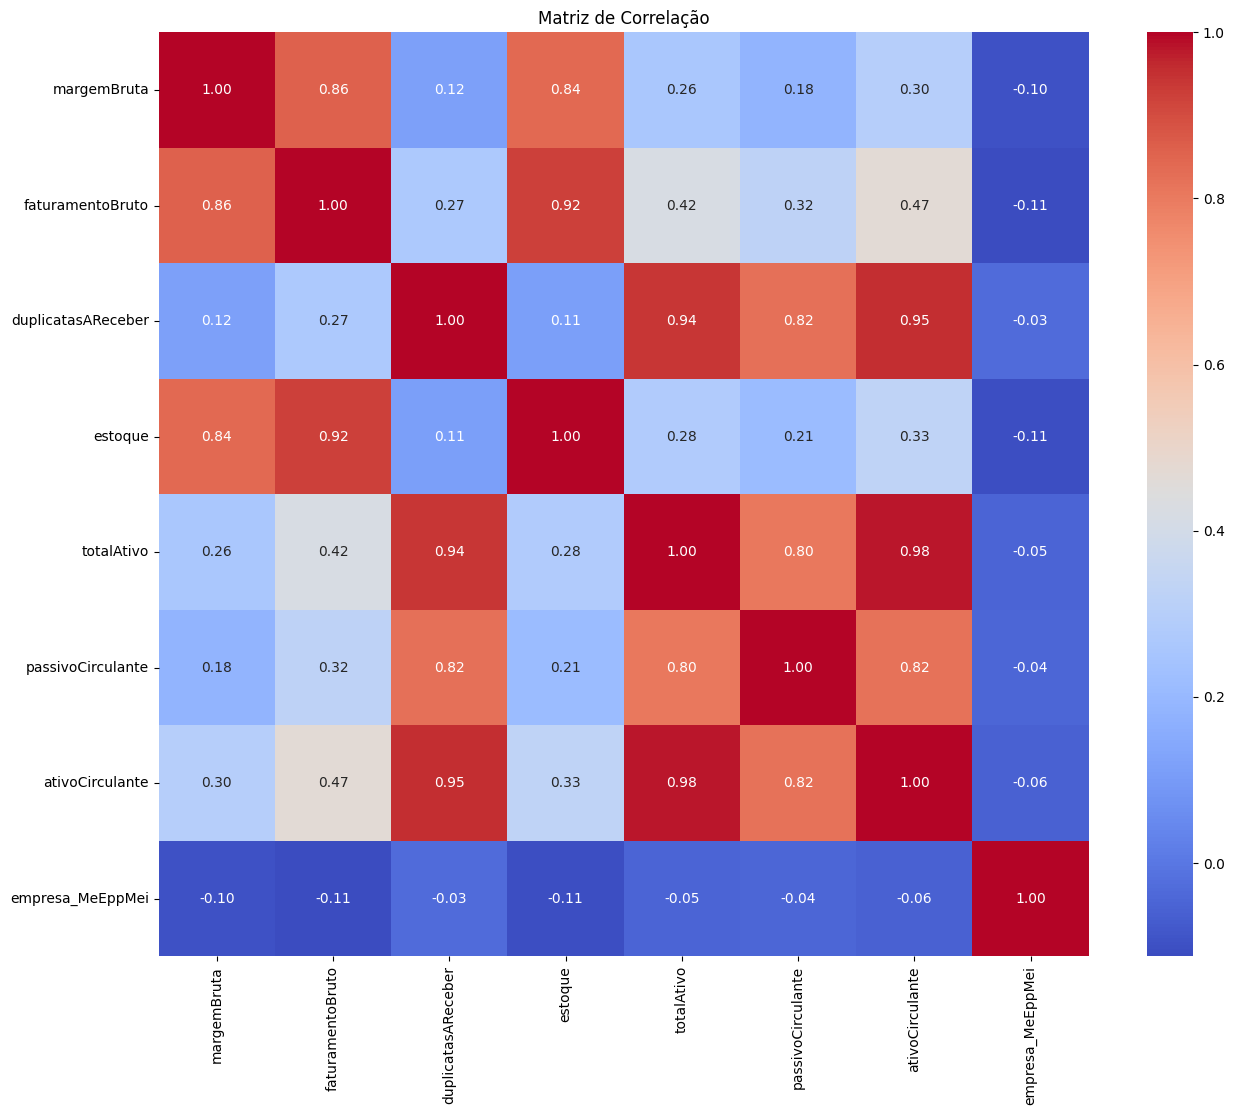

In [43]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

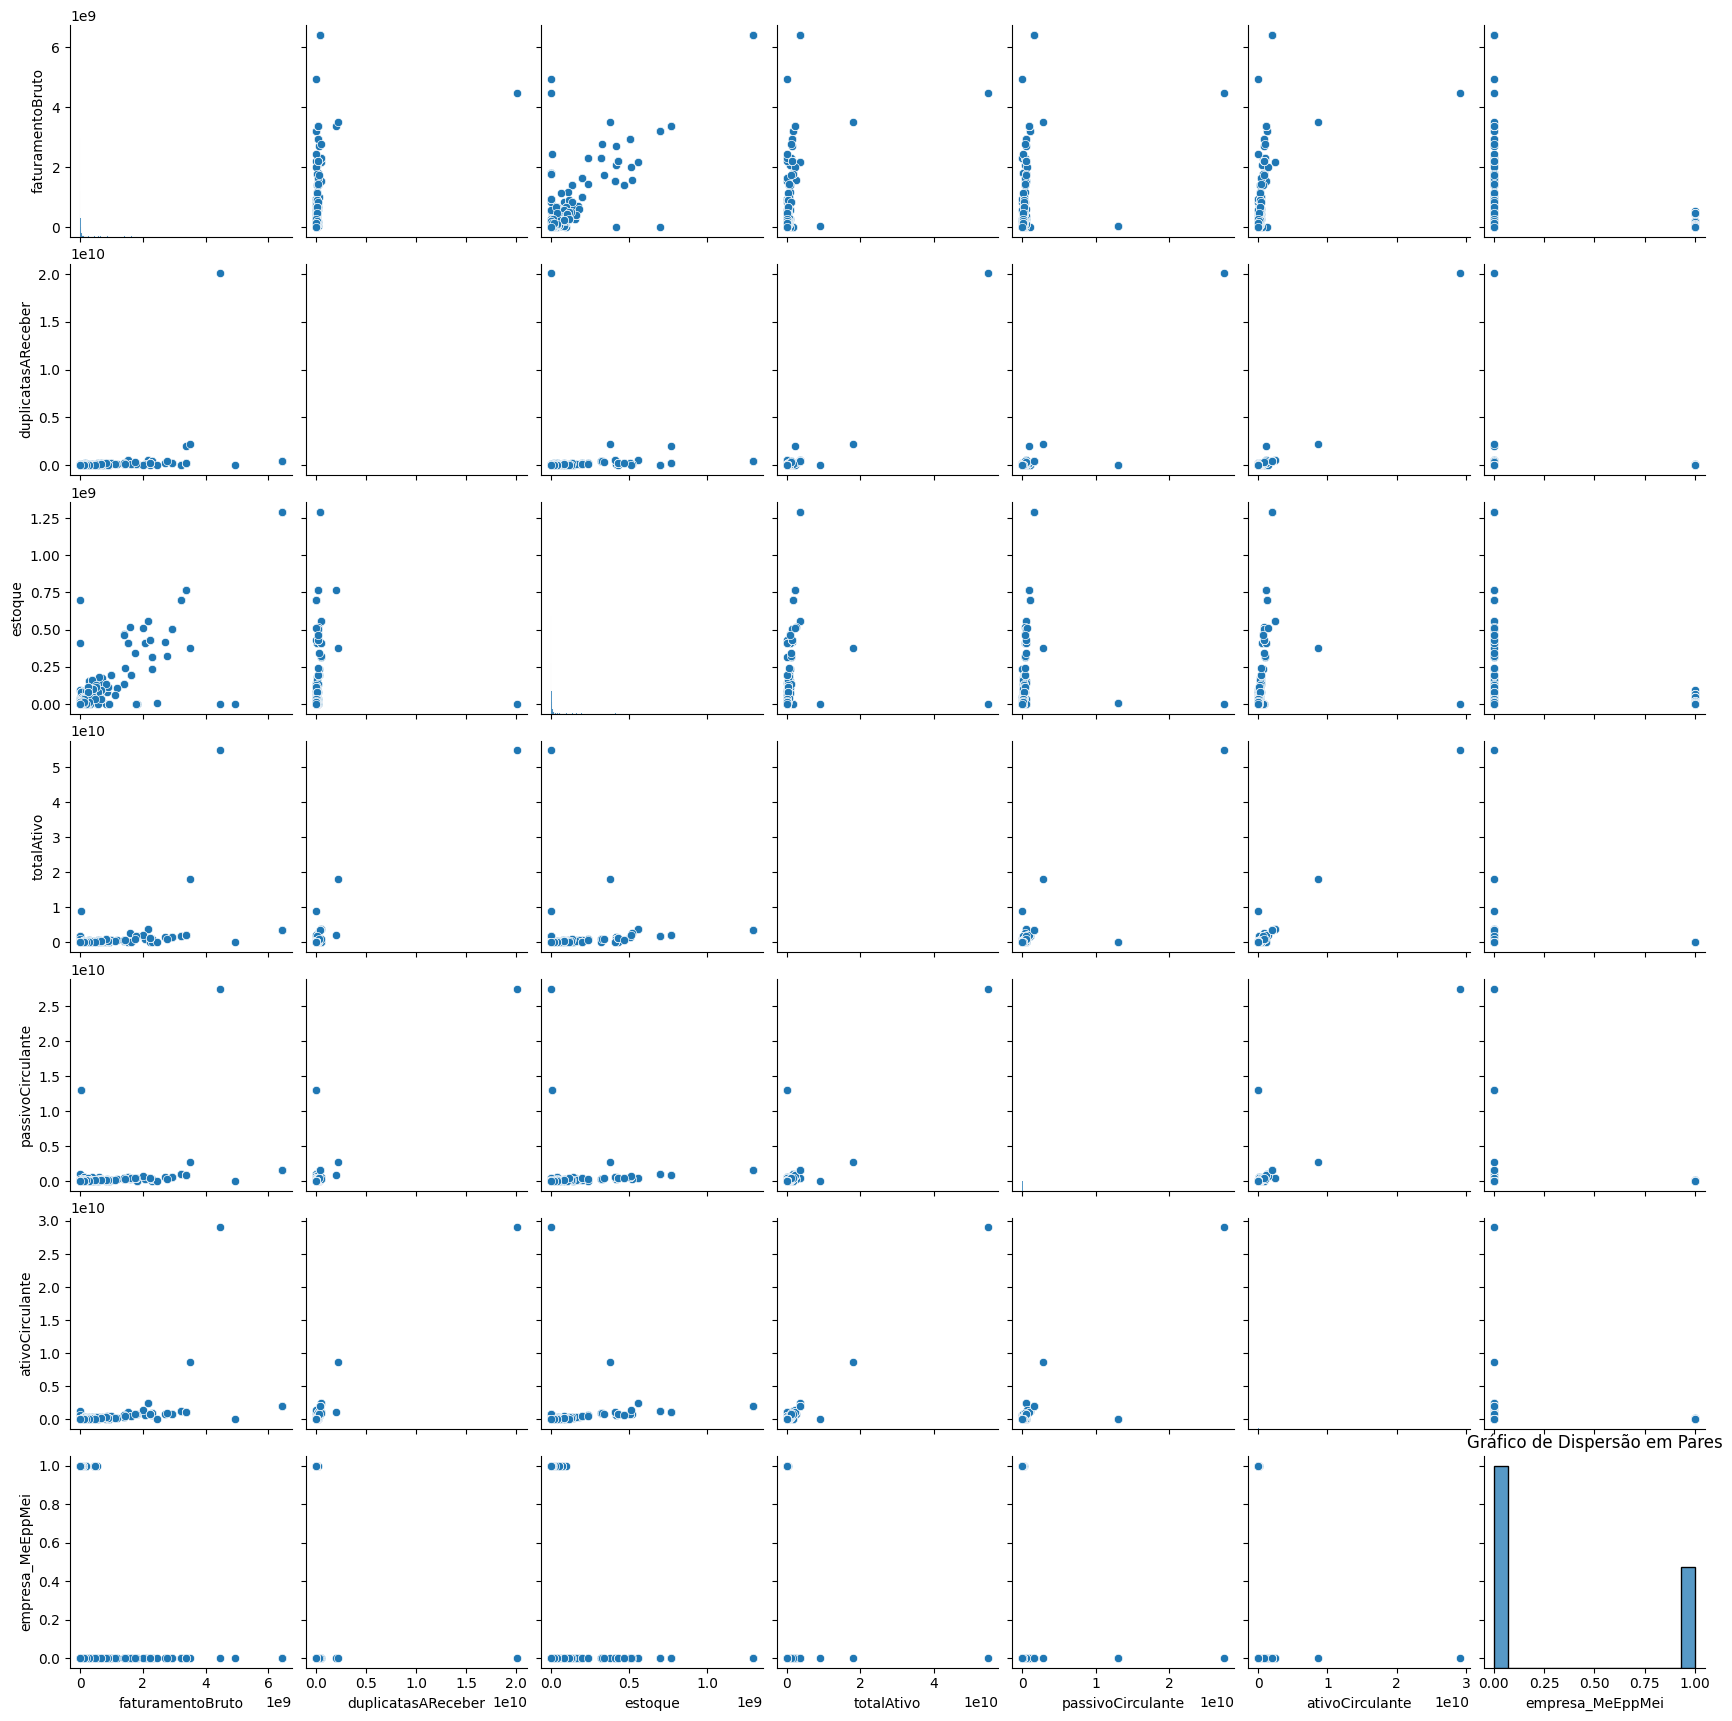

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de dispersão em pares
sns.pairplot(df_filtrado)
plt.title('Gráfico de Dispersão em Pares')
plt.show()

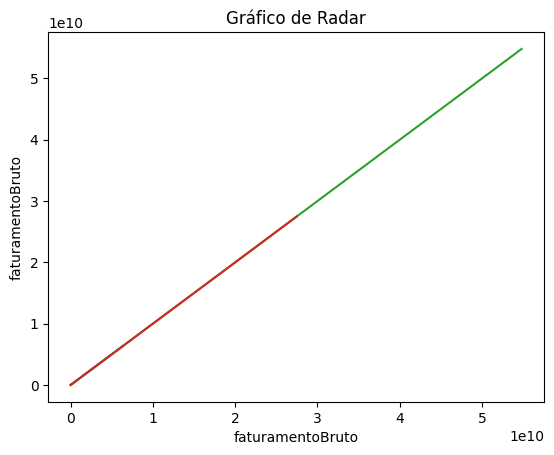

In [ ]:
# Gráfico de radar
variables = ['faturamentoBruto', 'endividamento', 'totalAtivo', 'passivoCirculante']
for variable in variables:
   sns.lineplot(data=df, x=variable, y=variable)
plt.title('Gráfico de Radar')
plt.show()

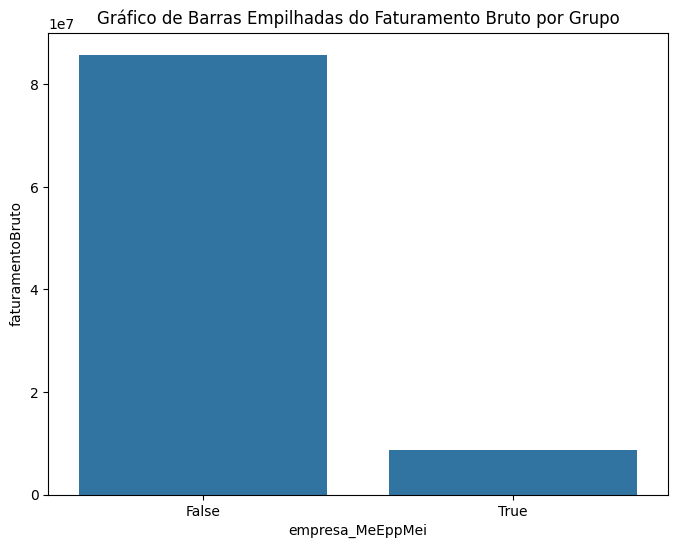

In [ ]:
# Gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='empresa_MeEppMei', y='faturamentoBruto', ci=None)
plt.title('Gráfico de Barras Empilhadas do Faturamento Bruto por Grupo')
plt.show()


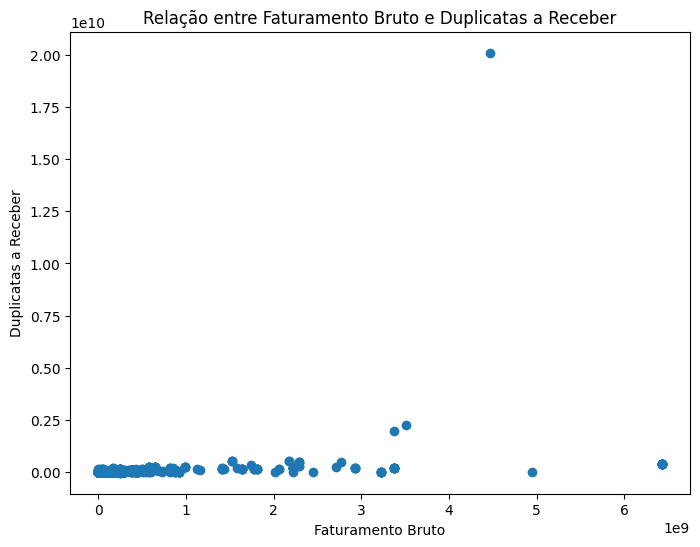

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtrado['faturamentoBruto'], df_filtrado['duplicatasAReceber'])
plt.xlabel('Faturamento Bruto')
plt.ylabel('Duplicatas a Receber')
plt.title('Relação entre Faturamento Bruto e Duplicatas a Receber')
plt.show()

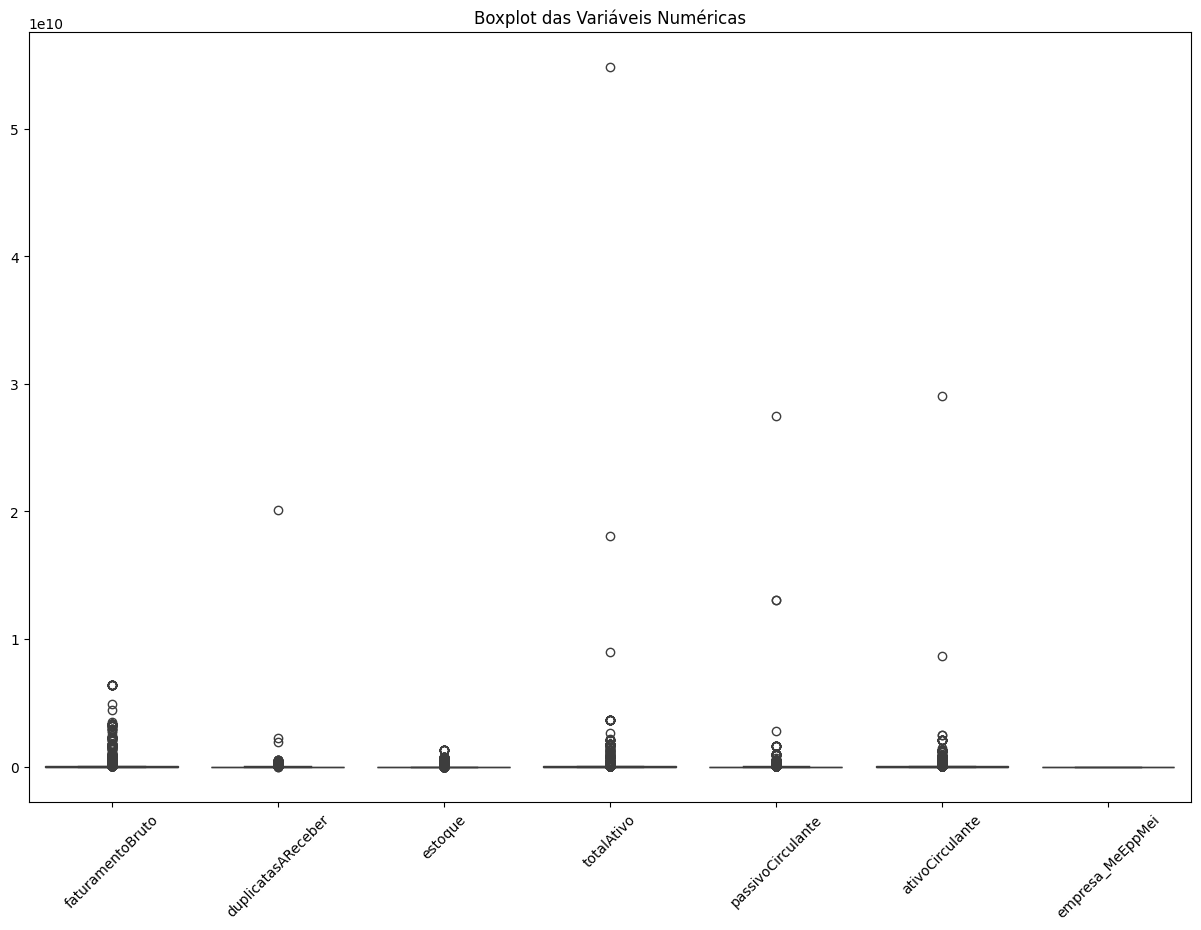

In [ ]:
# Histogramas podem ajudar a entender a distribuição das variáveis numéricas.

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtrado)
plt.xticks(rotation=45)
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

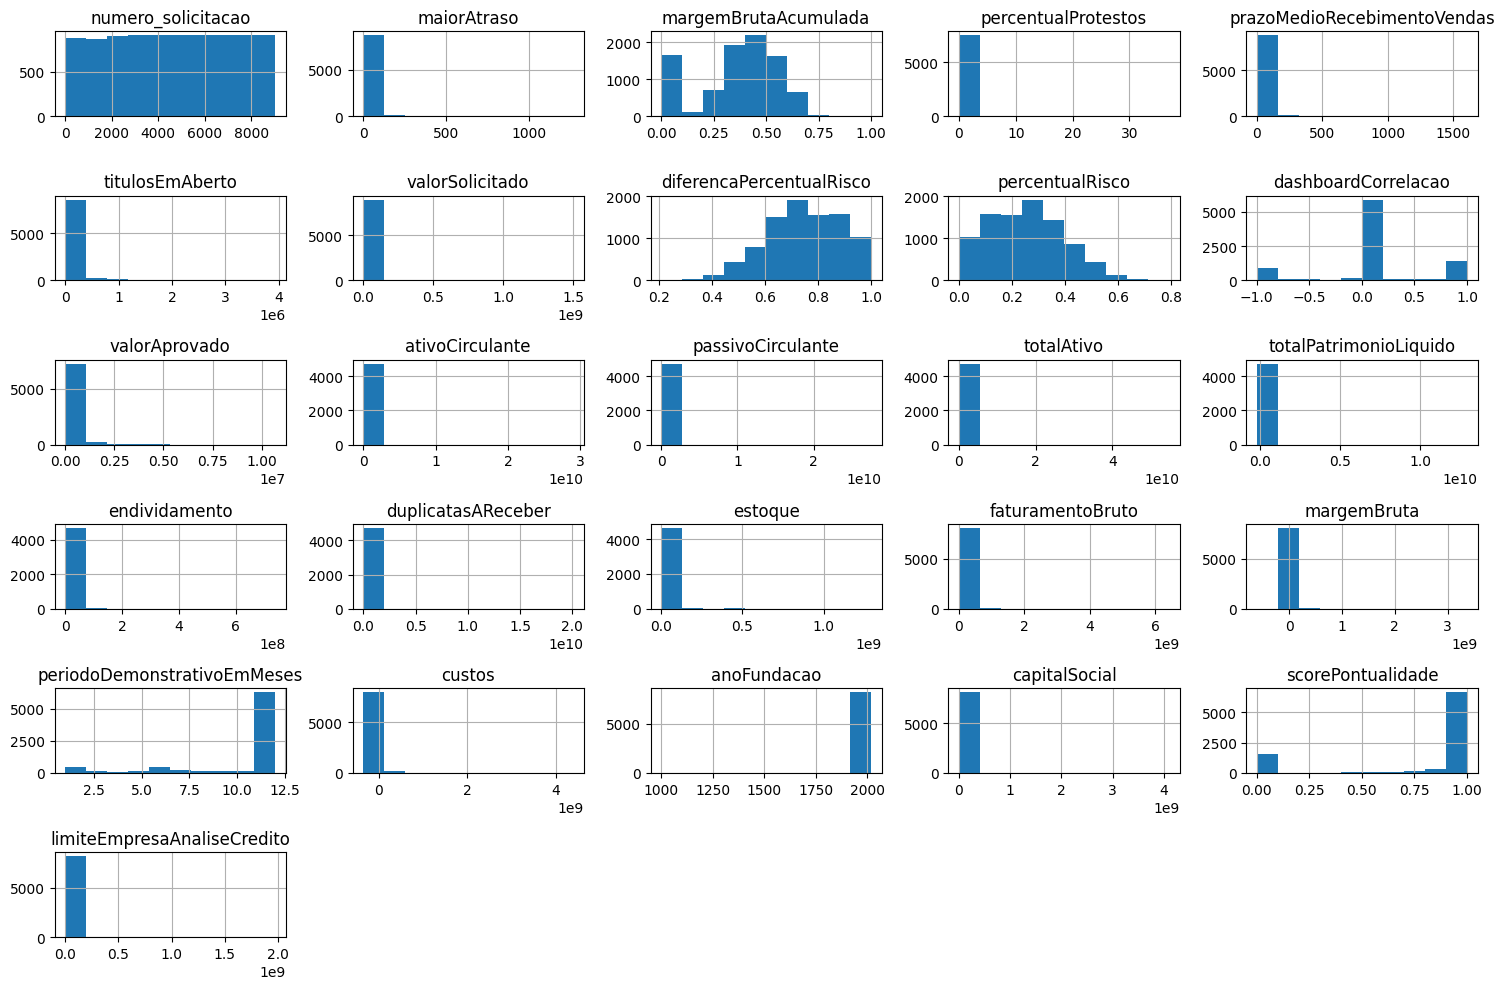

In [ ]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

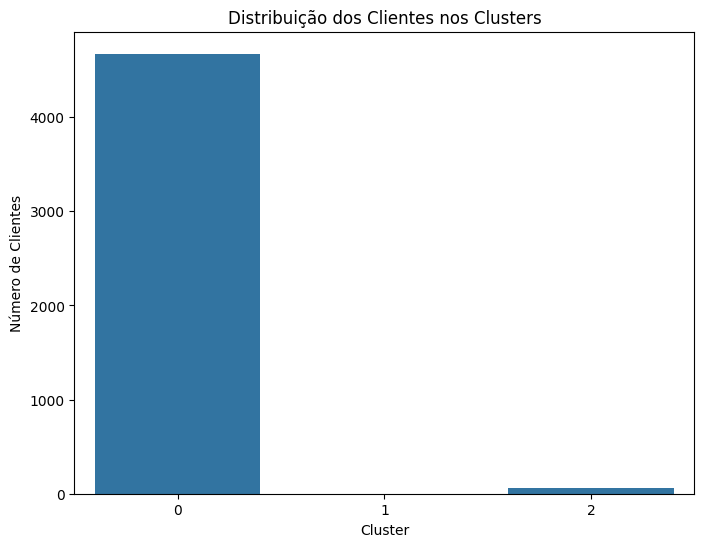

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pré-processamento de dados
# Suponha que você tenha selecionado apenas as colunas numéricas relevantes para a análise
numeric_columns = ['faturamentoBruto', 'duplicatasAReceber', 'estoque', 'totalAtivo', 'passivoCirculante', 'ativoCirculante']

# Removendo valores ausentes
df.dropna(subset=numeric_columns, inplace=True)

# Normalizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# Escolhendo o número de clusters
n_clusters = 3

# Aplicando o algoritmo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adicionando os rótulos dos clusters ao DataFrame original
df_filtrado['cluster'] = kmeans.labels_

# Visualizando a distribuição dos clientes nos clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster')
plt.title('Distribuição dos Clientes nos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.show()



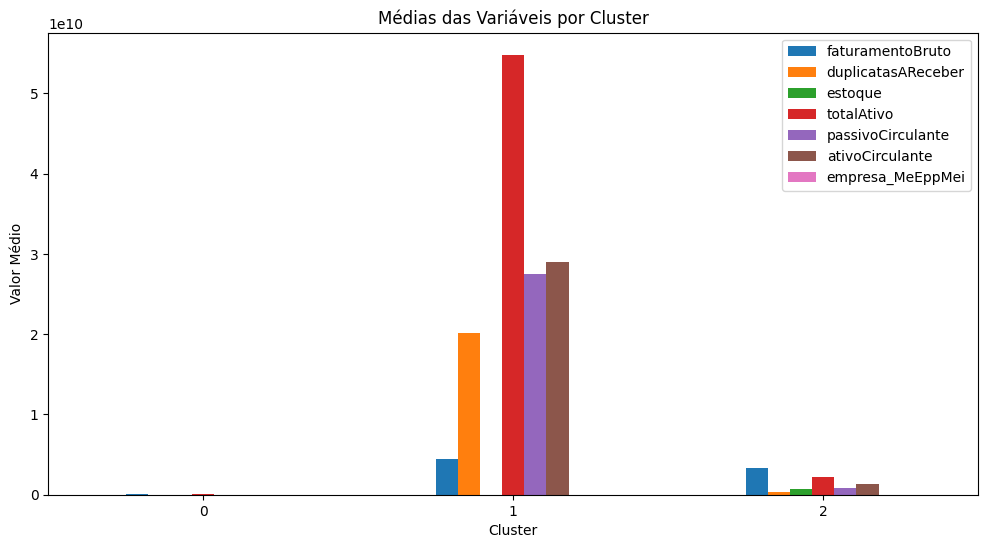

In [ ]:
# Calcular as médias das variáveis numéricas por cluster
cluster_means = df_filtrado.groupby('cluster').mean()

# Plotar gráfico de barras para cada variável por cluster
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Médias das Variáveis por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Médio')
plt.xticks(rotation=0)
plt.show()


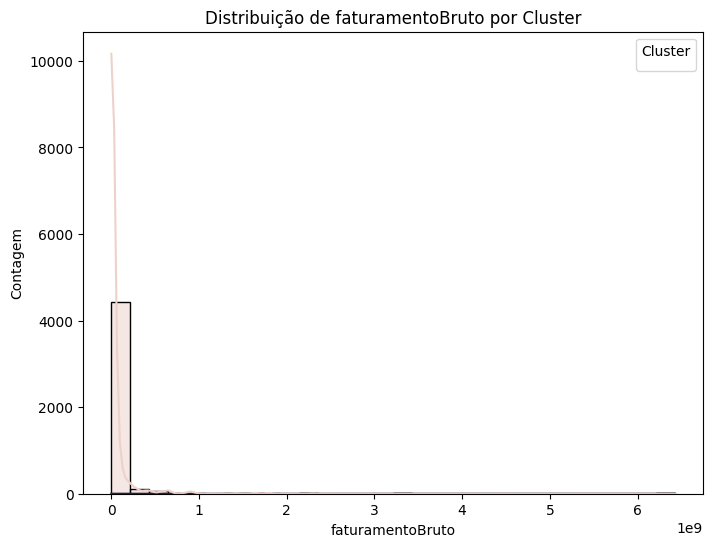

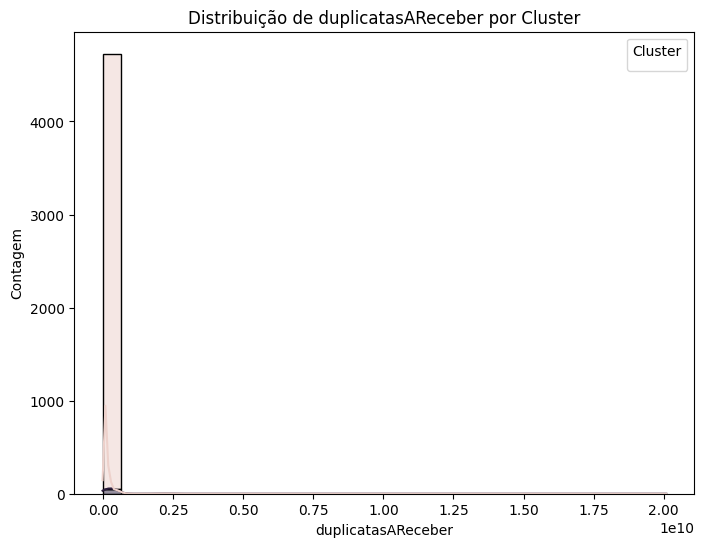

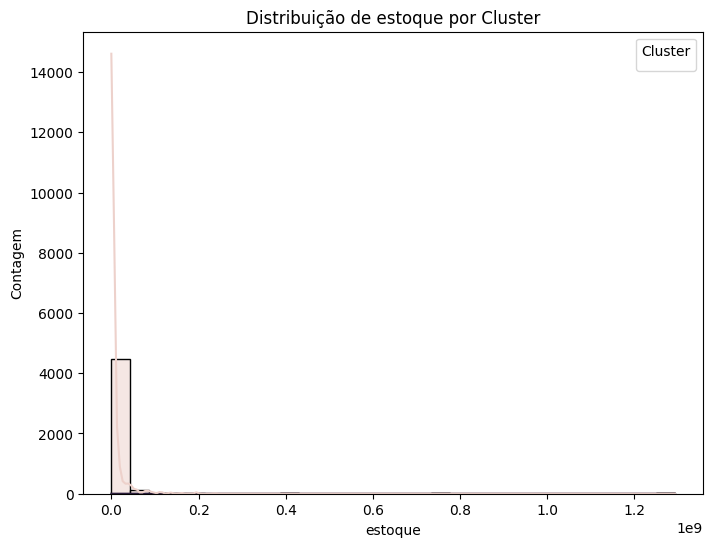

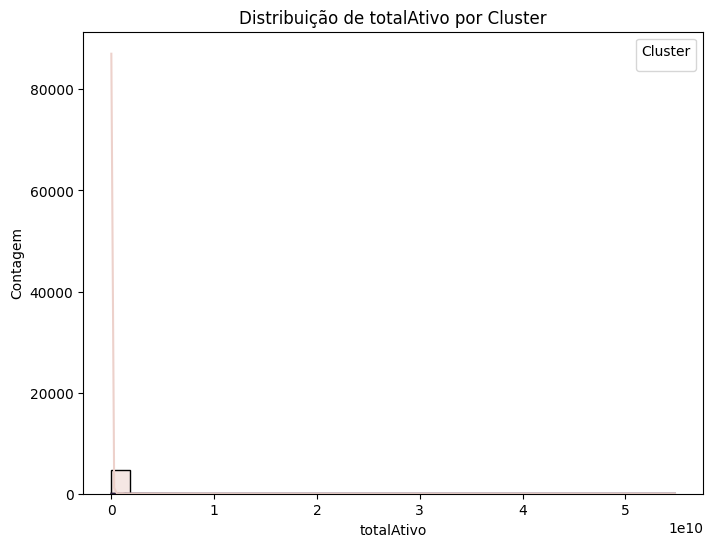

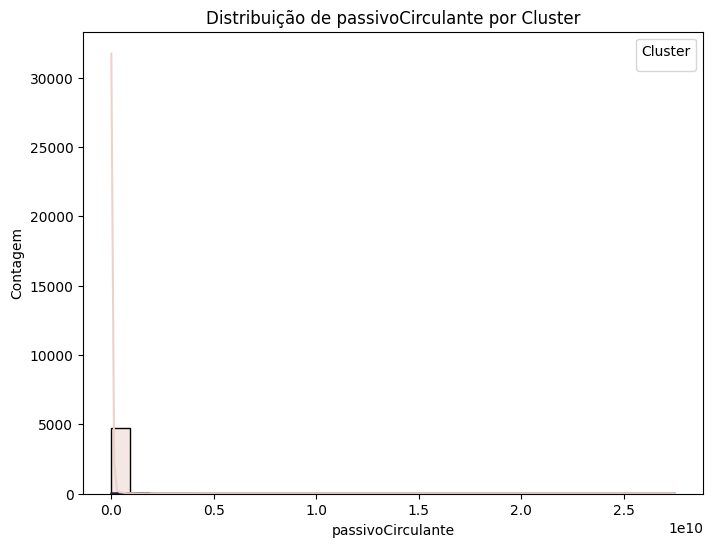

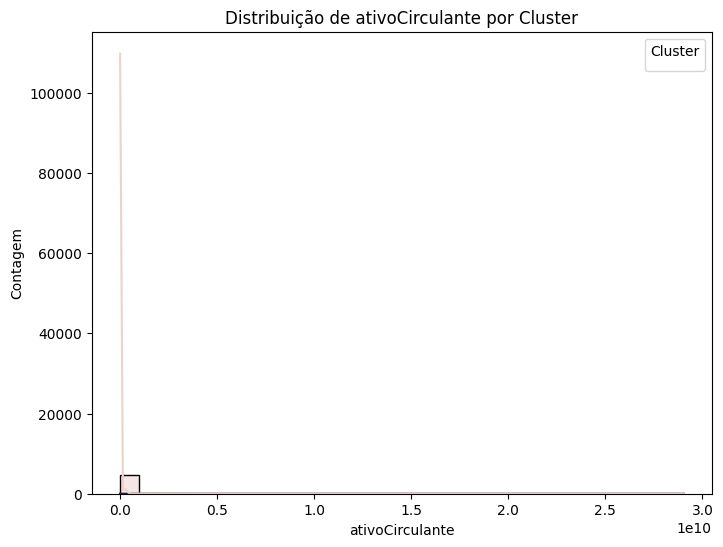

In [ ]:
# Plotar histogramas para cada variável por cluster
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, hue='cluster', multiple='stack', bins=30, kde=True)
    plt.title(f'Distribuição de {column} por Cluster')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.legend(title='Cluster')
    plt.show()


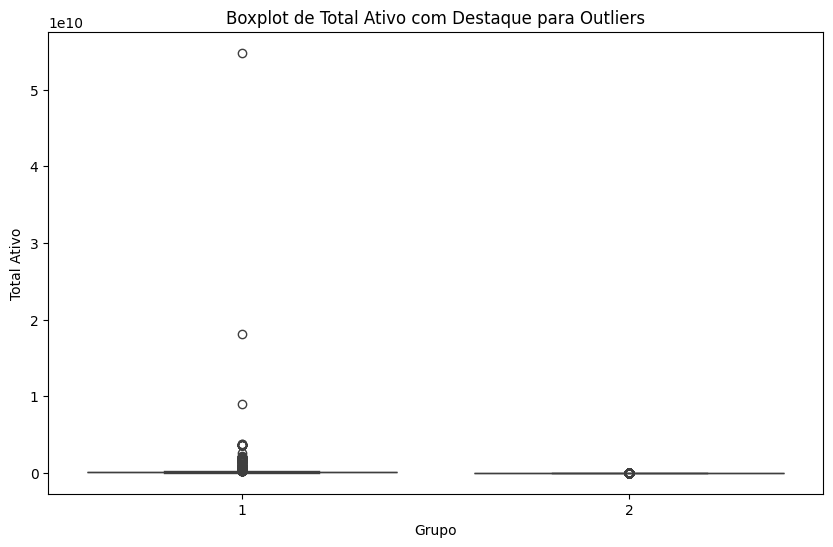

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='grupo', y='totalAtivo')
plt.title('Boxplot de Total Ativo com Destaque para Outliers')
plt.xlabel('Grupo')
plt.ylabel('Total Ativo')
plt.show()


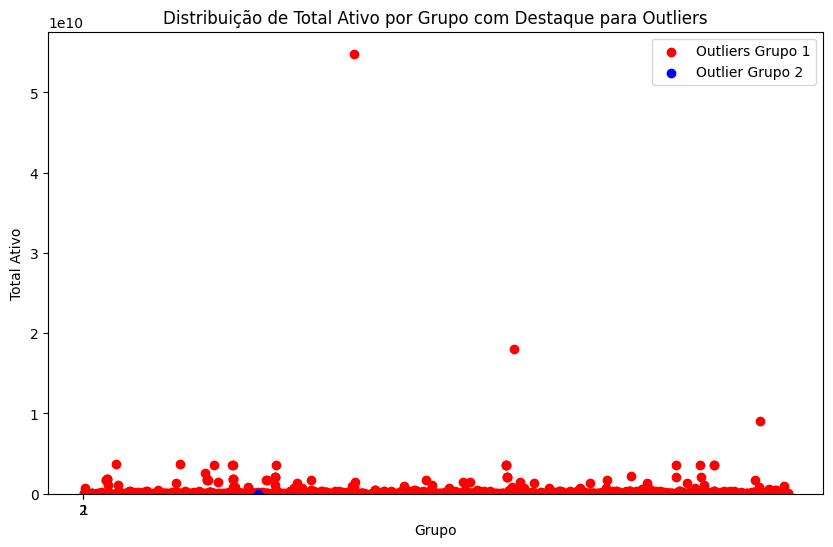

In [ ]:
plt.figure(figsize=(10, 6))

# Plotar gráfico de barras dos grupos
sns.barplot(data=df, x='grupo', y='totalAtivo', ci=None)

# Adicionar marcadores para os outliers no grupo 1
outliers_grupo1 = df[(df['grupo'] == 1) & ((df['totalAtivo'] < 1) | (df['totalAtivo'] > 5))]
plt.scatter(x=outliers_grupo1.index, y=outliers_grupo1['totalAtivo'], color='red', marker='o', label='Outliers Grupo 1')

# Adicionar marcador para o outlier no grupo 2
outlier_grupo2 = df[(df['grupo'] == 2) & (df['totalAtivo'] < 0)]
plt.scatter(x=outlier_grupo2.index, y=outlier_grupo2['totalAtivo'], color='blue', marker='o', label='Outlier Grupo 2')

plt.title('Distribuição de Total Ativo por Grupo com Destaque para Outliers')
plt.xlabel('Grupo')
plt.ylabel('Total Ativo')
plt.legend()
plt.show()


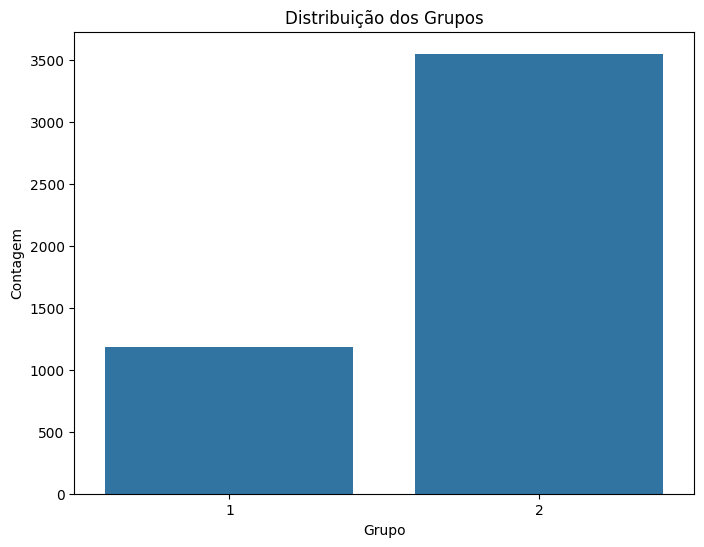

In [ ]:
# Determinar o limite entre ativos altos e baixos
limite_ativos = df['totalAtivo'].quantile(0.75)  # Por exemplo, podemos usar o quartil 3 (75º percentil) como limite

# Criar uma nova coluna 'grupo' com base no totalAtivo
df['grupo'] = 1  # Inicialmente, todos são atribuídos ao grupo 1
df.loc[df['totalAtivo'] <= limite_ativos, 'grupo'] = 2  # Os que são menores ou iguais ao limite são atribuídos ao grupo 2

# Visualizar a distribuição dos grupos
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grupo')
plt.title('Distribuição dos Grupos')
plt.xlabel('Grupo')
plt.ylabel('Contagem')
plt.show()


In [ ]:
X = df_filtrado.drop(columns=[""])
y = df_filtrado[""]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy))

Acurácia do modelo Random Forest: 0.79


In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gbm.fit(X_train, y_train)

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy))

In [ ]:
import numpy as np
sum(np.isnan('definicaoRisco'))